In [27]:
# Access Libraries 
import numpy as np 
import scipy as sp
import pandas as pd 
import seaborn as sb 

import matplotlib.pyplot as plt
import sklearn 

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [28]:
# Allow visualizations 
%matplotlib inline 
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

# Goal: Create prediction models for survival on Titanic

In [29]:
testData = pd.read_csv("C:\\Users\\loret\\Desktop\\DataSciencePrep\\Kaggle\\Titanic\\test.csv")
testData.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [36]:
trainData = pd.read_csv("C:\\Users\\loret\\Desktop\\DataSciencePrep\\Kaggle\\Titanic\\train.csv")
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:
testData.shape

(418, 11)

In [32]:
# Drop useless columns with a lot of nulls
# testData = testData.drop(['Cabin', 'Fare', 'Ticket', 'Name'], 1)
testData.head(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Create Function to Replace Nulls in Age

In [7]:
testData['Age'].groupby(testData['Pclass']).describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,98.0,40.918367,13.956799,6.00,30.0,42.0,50.75,76.0
2,88.0,28.777500,12.943458,0.92,21.0,26.5,35.25,63.0
3,146.0,24.027945,10.537105,0.17,18.5,24.0,29.75,60.5


In [43]:
# Make replacements for null values using the median
def approx_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 26.5 
        else:
            return 24 
    else: 
        return Age 

In [44]:
# Apply function
testData['Age'] = testData[['Age', 'Pclass']].apply(approx_age, axis=1)

In [47]:
trainData.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [48]:
trainData['Age'] = trainData[['Age', 'Pclass']].apply(approx_age, axis=1)

In [50]:
#trainData['Age']

In [51]:
# Check to see if nulls still there 
# Note: after fixing function, nulls no longer there 
# testData['Age']

In [52]:
trainData.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [90]:
testData.isnull().any() # No nulls now! 

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [91]:
# double check nulls in age colum
testData['Age'].isnull().sum()

0

### Swap Categorical Variables with Dummy Indicators

In [92]:
# Change embarked and pclass from categorical to 0/1 dummy indicators
sex = pd.get_dummies(testData['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [93]:
embark = pd.get_dummies(testData['Embarked'], drop_first=True)
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [55]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
len(testData)

418

### Drop & Swap

In [97]:
tDatadummy = testData.drop(['Sex','Embarked'], 1)


In [98]:
tDatadummy.head()



,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN


In [99]:
tData = pd.concat([tDatadummy, sex,embark], axis=1)

In [100]:
tData.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1


In [101]:
len(tData)

418

In [105]:
len(trData)

418

In [102]:
trData = trainData.drop(['Sex','Embarked'], 1)

In [103]:
trData = pd.concat([tDatadummy, sex, embark], axis=1)

In [104]:
trData.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1


In [22]:
# Drop unnecesary variables

In [85]:
ctrData = tData.drop(['Name', 'Parch', 'Ticket', 'Cabin', 'Q', 'S'], 1)
ctData.head()

,PassengerId,Pclass,Age,SibSp,Fare,male
0,892,3,34.5,0,7.8292,1
1,893,3,47.0,1,7.0000,0
2,894,2,62.0,0,9.6875,1
3,895,3,27.0,0,8.6625,1
4,896,3,22.0,1,12.2875,0


In [86]:
ctrData = trData.drop(['Survived', 'Name', 'Parch', 'Ticket', 'Cabin'], 1)

ValueError: labels ['Survived'] not contained in axis

In [81]:
ctData.iloc[:5, 0:6] # index locator 

,PassengerId,Pclass,Age,SibSp,Fare,male
0,892,3,34.5,0,7.8292,1
1,893,3,47.0,1,7.0000,0
2,894,2,62.0,0,9.6875,1
3,895,3,27.0,0,8.6625,1
4,896,3,22.0,1,12.2875,0


In [87]:
ctrData.head(5)

,PassengerId,Pclass,Age,SibSp,Fare,male
0,892,3,34.5,0,7.8292,1
1,893,3,47.0,1,7.0000,0
2,894,2,62.0,0,9.6875,1
3,895,3,27.0,0,8.6625,1
4,896,3,22.0,1,12.2875,0


## Naive Bayes - GaussianNB 

In [33]:
clf = GaussianNB()

In [79]:
X = ctData 
Y = ctrData[0:417:] 

In [67]:
print(X)

     PassengerId  Pclass   Age  SibSp      Fare  male
0            892       3  34.5      0    7.8292     1
1            893       3  47.0      1    7.0000     0
2            894       2  62.0      0    9.6875     1
3            895       3  27.0      0    8.6625     1
4            896       3  22.0      1   12.2875     0
5            897       3  14.0      0    9.2250     1
6            898       3  30.0      0    7.6292     0
7            899       2  26.0      1   29.0000     1
8            900       3  18.0      0    7.2292     0
9            901       3  21.0      2   24.1500     1
10           902       3  24.0      0    7.8958     1
11           903       1  46.0      0   26.0000     1
12           904       1  23.0      1   82.2667     0
13           905       2  63.0      1   26.0000     1
14           906       1  47.0      1   61.1750     0
15           907       2  24.0      1   27.7208     0
16           908       2  35.0      0   12.3500     1
17           909       3  21

In [80]:
print(Y)

     PassengerId  Pclass   Age  SibSp      Fare
0              1       3  34.5      1    7.2500
1              2       1  47.0      1   71.2833
2              3       3  62.0      0    7.9250
3              4       1  27.0      1   53.1000
4              5       3  22.0      0    8.0500
5              6       3  14.0      0    8.4583
6              7       1  30.0      0   51.8625
7              8       3  26.0      3   21.0750
8              9       3  18.0      0   11.1333
9             10       2  21.0      1   30.0708
10            11       3  24.0      1   16.7000
11            12       1  46.0      0   26.5500
12            13       3  23.0      0    8.0500
13            14       3  63.0      1   31.2750
14            15       3  47.0      0    7.8542
15            16       2  24.0      0   16.0000
16            17       3  35.0      4   29.1250
17            18       2  21.0      0   13.0000
18            19       3  27.0      1   18.0000
19            20       3  45.0      0   

In [75]:
ctrData.shape

(891, 5)

In [76]:
891 - 418


473

In [34]:
# try to predict
pred = clf.predict(ctData[:, 0:5])

TypeError: unhashable type: 'slice'

In [ ]:
# tDatadummy = testData.drop(['Sex','Embarked'], 1)


### Test for Independence 

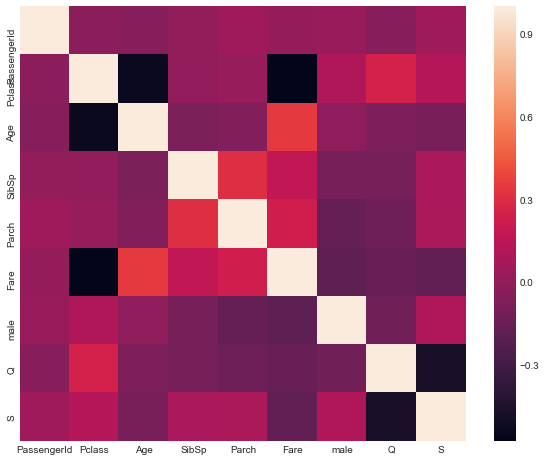

In [22]:
sb.heatmap(tData.corr())
# Age & Pclass are highly correlated, don't including in logistic regression

## Run Logistic Regression

In [23]:
tData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), object(3), uint8(3)
memory usage: 30.7+ KB


In [30]:
x = tData.ix[:,(2,3,4,5)].values
y = tData.ix[:,0].values 

In [31]:
# Define models = split dataset, set size
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)

### Deploy & Evaluate Model

In [66]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

ValueError: could not convert string to float: 'Lefebre, Mrs. Frank (Frances)'

In [33]:
# run logistic regression and predict 
y_pred = LogReg.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [34]:
from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix 

NameError: name 'y_pred' is not defined

In [35]:
# Classification report 
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

## Implement Model